Importing Neccessary Programmes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lxml
import html5lib
from bs4 import BeautifulSoup

Reading CSV files & Web Scraping (htmL_read)

In [2]:
#Reading three CSV files that contain Ireland population, GDP and education data from the OECD and the World Bank
irl_pop = pd.read_csv(r'C:\Users\jwhol\Desktop\Data Analytics Course\Sources\OECD\Ireland Population.csv')
irl_gdp = pd.read_csv(r'C:\Users\jwhol\Desktop\Data Analytics Course\Sources\World Bank\ireland_gdp.csv')
irl_edu = pd.read_csv(r'C:\Users\jwhol\Desktop\Data Analytics Course\Sources\OECD\eduation_rate.csv')

In [3]:
#Web Scraping a table of Irish economic data from wikipedia to get the unemployment rate over time

url = 'https://en.wikipedia.org/wiki/Economy_of_the_Republic_of_Ireland'
dfs = pd.read_html(url)
print(dfs[1])


    Year  GDP (in Bil. US$PPP)  GDP per capita (in US$ PPP)  \
0   1980                  25.3                       7390.3   
1   1981                  28.4                       8190.6   
2   1982                  30.6                       8733.9   
3   1983                  31.6                       8948.0   
4   1984                  33.8                       9500.2   
5   1985                  35.5                       9960.4   
6   1986                  36.4                      10202.3   
7   1987                  38.7                      10817.3   
8   1988                  41.2                      11586.1   
9   1989                  45.2                      12793.2   
10  1990                  50.6                      14310.4   
11  1991                  53.1                      14952.4   
12  1992                  56.3                      15712.2   
13  1993                  58.9                      16366.5   
14  1994                  63.7                      176

In [4]:
#I am isolating the columns that I want
print(dfs[1]['Year'])
print(dfs[1]['Unemployment (in Percent)'])

0     1980
1     1981
2     1982
3     1983
4     1984
5     1985
6     1986
7     1987
8     1988
9     1989
10    1990
11    1991
12    1992
13    1993
14    1994
15    1995
16    1996
17    1997
18    1998
19    1999
20    2000
21    2001
22    2002
23    2003
24    2004
25    2005
26    2006
27    2007
28    2008
29    2009
30    2010
31    2011
32    2012
33    2013
34    2014
35    2015
36    2016
37    2017
38    2018
39    2019
40    2020
41    2021
42    2022
43    2023
44    2024
45    2025
46    2026
47    2027
Name: Year, dtype: int64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5     17.7%
6     18.1%
7     18.8%
8     18.4%
9     17.9%
10    17.2%
11    19.0%
12    16.3%
13    16.7%
14    15.1%
15    14.1%
16    11.8%
17     9.9%
18     7.6%
19     5.9%
20     4.4%
21     4.2%
22     4.7%
23     4.9%
24     4.8%
25     4.6%
26     4.8%
27     5.0%
28     6.8%
29    12.6%
30    14.6%
31    15.4%
32    15.5%
33    13.8%
34    11.9%
35     9.9%
36     8.4%
37 

In [5]:
df = dfs[1]

In [6]:
#I am extracting the columns that I need
irl_unemployment = df[['Year','Unemployment (in Percent)']]
print(irl_unemployment)

    Year Unemployment (in Percent)
0   1980                       NaN
1   1981                       NaN
2   1982                       NaN
3   1983                       NaN
4   1984                       NaN
5   1985                     17.7%
6   1986                     18.1%
7   1987                     18.8%
8   1988                     18.4%
9   1989                     17.9%
10  1990                     17.2%
11  1991                     19.0%
12  1992                     16.3%
13  1993                     16.7%
14  1994                     15.1%
15  1995                     14.1%
16  1996                     11.8%
17  1997                      9.9%
18  1998                      7.6%
19  1999                      5.9%
20  2000                      4.4%
21  2001                      4.2%
22  2002                      4.7%
23  2003                      4.9%
24  2004                      4.8%
25  2005                      4.6%
26  2006                      4.8%
27  2007            

Merging and Cleaning the Data, I am first going to merge all my data and then clean it. 

In [7]:
#To begin I am going to work with irl_pop & irl_gdp
print(irl_pop.head())
print(irl_gdp.head())

   Year  Population  Flag Codes
0  1990     3505800         NaN
1  1991     3525700         NaN
2  1992     3554500         NaN
3  1993     3574100         NaN
4  1994     3585900         NaN
   Year          GDP
0  1990  49305632408
1  1991  49787501584
2  1992  55918538121
3  1993  52417477613
4  1994  57097656065


In [8]:
#I use the merge() method with an outer merge to merge irl_pop and irl_gdp
irl_pop_gdp = pd.merge(irl_pop, irl_gdp, how='outer')
print(irl_pop_gdp.head())



   Year  Population  Flag Codes          GDP
0  1990     3505800         NaN  49305632408
1  1991     3525700         NaN  49787501584
2  1992     3554500         NaN  55918538121
3  1993     3574100         NaN  52417477613
4  1994     3585900         NaN  57097656065


In [9]:
#I use the merge() method with an outer merge to merge irl_pop_gdp and irl_edu
irl_pop_gdp_edu = pd.merge(irl_pop_gdp, irl_edu, how='outer')
print(irl_pop_gdp_edu.head())

   Year  Population  Flag Codes          GDP  Tertiary Education % 25-34
0  1990     3505800         NaN  49305632408                         NaN
1  1991     3525700         NaN  49787501584                       19.66
2  1992     3554500         NaN  55918538121                       21.19
3  1993     3574100         NaN  52417477613                         NaN
4  1994     3585900         NaN  57097656065                       24.38


In [10]:
#I use the merge() method with an outer merge to merge irl_pop_gdp_edu and irl_unemployment
irl_econ_data = pd.merge(irl_pop_gdp_edu, irl_unemployment, how='outer')
print(irl_econ_data.head())

   Year  Population  Flag Codes           GDP  Tertiary Education % 25-34  \
0  1990   3505800.0         NaN  4.930563e+10                         NaN   
1  1991   3525700.0         NaN  4.978750e+10                       19.66   
2  1992   3554500.0         NaN  5.591854e+10                       21.19   
3  1993   3574100.0         NaN  5.241748e+10                         NaN   
4  1994   3585900.0         NaN  5.709766e+10                       24.38   

  Unemployment (in Percent)  
0                     17.2%  
1                     19.0%  
2                     16.3%  
3                     16.7%  
4                     15.1%  


In [11]:
#I will now use a number of methods and attributes to examine the dataframe

In [12]:
irl_econ_data.head()

,Year,Population,Flag Codes,GDP,Tertiary Education % 25-34,Unemployment (in Percent)
0,1990,3505800.0,NaN,4.930563e+10,NaN,17.2%
1,1991,3525700.0,NaN,4.978750e+10,19.66,19.0%
2,1992,3554500.0,NaN,5.591854e+10,21.19,16.3%
3,1993,3574100.0,NaN,5.241748e+10,NaN,16.7%
4,1994,3585900.0,NaN,5.709766e+10,24.38,15.1%


In [13]:
irl_econ_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        48 non-null     int64  
 1   Population                  32 non-null     float64
 2   Flag Codes                  0 non-null      float64
 3   GDP                         32 non-null     float64
 4   Tertiary Education % 25-34  26 non-null     float64
 5   Unemployment (in Percent)   43 non-null     object 
dtypes: float64(4), int64(1), object(1)
memory usage: 2.6+ KB


In [14]:
irl_econ_data.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
           dtype='int64')

In [15]:
irl_econ_data.describe()

,Year,Population,Flag Codes,GDP,Tertiary Education % 25-34
count,48.00,3.200000e+01,0.0,3.200000e+01,26.000000
mean,2003.50,4.199788e+06,NaN,2.009694e+11,43.304231
std,14.00,5.116418e+05,NaN,1.239997e+11,11.818313
min,1980.00,3.505800e+06,NaN,4.930563e+10,19.660000
25%,1991.75,3.693390e+06,NaN,8.836372e+10,35.672500
50%,2003.50,4.183384e+06,NaN,2.168953e+11,46.245000
75%,2015.25,4.622362e+06,NaN,2.714213e+11,51.767500
max,2027.00,5.011460e+06,NaN,5.041826e+11,62.880000


In [16]:
irl_econ_data.dtypes

Year                            int64
Population                    float64
Flag Codes                    float64
GDP                           float64
Tertiary Education % 25-34    float64
Unemployment (in Percent)      object
dtype: object

In [17]:
irl_econ_data.shape

(48, 6)

In [18]:
irl_econ_data.isnull().sum()

Year                           0
Population                    16
Flag Codes                    48
GDP                           16
Tertiary Education % 25-34    22
Unemployment (in Percent)      5
dtype: int64

In [19]:
print(irl_econ_data)

    Year  Population  Flag Codes           GDP  Tertiary Education % 25-34  \
0   1990   3505800.0         NaN  4.930563e+10                         NaN   
1   1991   3525700.0         NaN  4.978750e+10                       19.66   
2   1992   3554500.0         NaN  5.591854e+10                       21.19   
3   1993   3574100.0         NaN  5.241748e+10                         NaN   
4   1994   3585900.0         NaN  5.709766e+10                       24.38   
5   1995   3601300.0         NaN  6.913982e+10                       27.18   
6   1996   3626087.0         NaN  7.579079e+10                         NaN   
7   1997   3664313.0         NaN  8.285665e+10                         NaN   
8   1998   3703082.0         NaN  9.019941e+10                         NaN   
9   1999   3741647.0         NaN  9.889396e+10                         NaN   
10  2000   3789536.0         NaN  1.002076e+11                       29.80   
11  2001   3847198.0         NaN  1.093467e+11                  

In [20]:
irl_econ_data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
dtype: bool

In [21]:
# From using these methods to examine the data I have discovered a number of things
# I have an column I don't need 'Flag Codes'
# Indexs 32-47 are NaN values that I do not need
# I have a significant number of NaN values which I need to resolve
# Unemployment (in Percent) is an object, I will have to change this to float64, I also want to remove the percentage sign
# We do not have any duplicates

In [22]:
# I am dropping the 'Flag Codes' column
irl_econ_data.drop('Flag Codes', axis=1, inplace=True)

In [23]:
print(irl_econ_data.head())

   Year  Population           GDP  Tertiary Education % 25-34  \
0  1990   3505800.0  4.930563e+10                         NaN   
1  1991   3525700.0  4.978750e+10                       19.66   
2  1992   3554500.0  5.591854e+10                       21.19   
3  1993   3574100.0  5.241748e+10                         NaN   
4  1994   3585900.0  5.709766e+10                       24.38   

  Unemployment (in Percent)  
0                     17.2%  
1                     19.0%  
2                     16.3%  
3                     16.7%  
4                     15.1%  


In [24]:
#I am dropping indexs 32-47 as I do not need them for my analysis
irl_econ_data = irl_econ_data.drop([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [25]:
irl_econ_data['Tertiary Education % 25-34'].fillna(method='bfill', inplace=True)

In [26]:
print(irl_econ_data)

    Year  Population           GDP  Tertiary Education % 25-34  \
0   1990   3505800.0  4.930563e+10                       19.66   
1   1991   3525700.0  4.978750e+10                       19.66   
2   1992   3554500.0  5.591854e+10                       21.19   
3   1993   3574100.0  5.241748e+10                       24.38   
4   1994   3585900.0  5.709766e+10                       24.38   
5   1995   3601300.0  6.913982e+10                       27.18   
6   1996   3626087.0  7.579079e+10                       29.80   
7   1997   3664313.0  8.285665e+10                       29.80   
8   1998   3703082.0  9.019941e+10                       29.80   
9   1999   3741647.0  9.889396e+10                       29.80   
10  2000   3789536.0  1.002076e+11                       29.80   
11  2001   3847198.0  1.093467e+11                       33.41   
12  2002   3917203.0  1.285960e+11                       35.21   
13  2003   3979853.0  1.646708e+11                       37.06   
14  2004  

In [27]:
# I now want to change Unemployment (in Percent) to a float and get rid of the percentage sign
irl_econ_data['Unemployment (in Percent)'] = irl_econ_data['Unemployment (in Percent)'].str.replace('%', '')
irl_econ_data['Unemployment (in Percent)'] = irl_econ_data['Unemployment (in Percent)'].astype(float)

In [28]:
irl_econ_data.dtypes

Year                            int64
Population                    float64
GDP                           float64
Tertiary Education % 25-34    float64
Unemployment (in Percent)     float64
dtype: object

In [29]:
print(irl_econ_data)

    Year  Population           GDP  Tertiary Education % 25-34  \
0   1990   3505800.0  4.930563e+10                       19.66   
1   1991   3525700.0  4.978750e+10                       19.66   
2   1992   3554500.0  5.591854e+10                       21.19   
3   1993   3574100.0  5.241748e+10                       24.38   
4   1994   3585900.0  5.709766e+10                       24.38   
5   1995   3601300.0  6.913982e+10                       27.18   
6   1996   3626087.0  7.579079e+10                       29.80   
7   1997   3664313.0  8.285665e+10                       29.80   
8   1998   3703082.0  9.019941e+10                       29.80   
9   1999   3741647.0  9.889396e+10                       29.80   
10  2000   3789536.0  1.002076e+11                       29.80   
11  2001   3847198.0  1.093467e+11                       33.41   
12  2002   3917203.0  1.285960e+11                       35.21   
13  2003   3979853.0  1.646708e+11                       37.06   
14  2004  

After Merging and Cleaning my Data I am not going to add GDP per Capita, GDP Growth Rate and Population Growth Rate columns

In [30]:
#Here I am using the pct_change() function to show the annual population growth rate in Ireland and add it as a column
irl_econ_data['Annual Pop Growth'] = irl_econ_data['Population'].pct_change() * 100

In [31]:
print(irl_econ_data.head())

   Year  Population           GDP  Tertiary Education % 25-34  \
0  1990   3505800.0  4.930563e+10                       19.66   
1  1991   3525700.0  4.978750e+10                       19.66   
2  1992   3554500.0  5.591854e+10                       21.19   
3  1993   3574100.0  5.241748e+10                       24.38   
4  1994   3585900.0  5.709766e+10                       24.38   

   Unemployment (in Percent)  Annual Pop Growth  
0                       17.2                NaN  
1                       19.0           0.567631  
2                       16.3           0.816859  
3                       16.7           0.551414  
4                       15.1           0.330153  


In [32]:
#Here I am using the assign() function to to divide GDP by Population to give Ireland's GDP per capita and add it as a column
irl_econ_data = irl_econ_data.assign(GDP_Per_Capita=irl_econ_data['GDP']/irl_econ_data['Population'])

In [33]:
print(irl_econ_data.head())

   Year  Population           GDP  Tertiary Education % 25-34  \
0  1990   3505800.0  4.930563e+10                       19.66   
1  1991   3525700.0  4.978750e+10                       19.66   
2  1992   3554500.0  5.591854e+10                       21.19   
3  1993   3574100.0  5.241748e+10                       24.38   
4  1994   3585900.0  5.709766e+10                       24.38   

   Unemployment (in Percent)  Annual Pop Growth  GDP_Per_Capita  
0                       17.2                NaN    14064.017459  
1                       19.0           0.567631    14121.309693  
2                       16.3           0.816859    15731.759213  
3                       16.7           0.551414    14665.923621  
4                       15.1           0.330153    15922.824414  


In [34]:
#Here I am using the pct_change() function to show the annual GDP growth rate in Ireland and add it as a column
irl_econ_data['Annual GDP Growth'] = irl_econ_data['GDP'].pct_change() * 100

In [35]:
print(irl_econ_data)

    Year  Population           GDP  Tertiary Education % 25-34  \
0   1990   3505800.0  4.930563e+10                       19.66   
1   1991   3525700.0  4.978750e+10                       19.66   
2   1992   3554500.0  5.591854e+10                       21.19   
3   1993   3574100.0  5.241748e+10                       24.38   
4   1994   3585900.0  5.709766e+10                       24.38   
5   1995   3601300.0  6.913982e+10                       27.18   
6   1996   3626087.0  7.579079e+10                       29.80   
7   1997   3664313.0  8.285665e+10                       29.80   
8   1998   3703082.0  9.019941e+10                       29.80   
9   1999   3741647.0  9.889396e+10                       29.80   
10  2000   3789536.0  1.002076e+11                       29.80   
11  2001   3847198.0  1.093467e+11                       33.41   
12  2002   3917203.0  1.285960e+11                       35.21   
13  2003   3979853.0  1.646708e+11                       37.06   
14  2004  

In [36]:
#We can see that for 'Annual GDP Growth' and 'Annual Pop Growth' that the year 1990 has an NaN value as there is no preceeding year to calulate from, I will fill these with zero
irl_econ_data=irl_econ_data.fillna(0)

In [37]:
print(irl_econ_data)

    Year  Population           GDP  Tertiary Education % 25-34  \
0   1990   3505800.0  4.930563e+10                       19.66   
1   1991   3525700.0  4.978750e+10                       19.66   
2   1992   3554500.0  5.591854e+10                       21.19   
3   1993   3574100.0  5.241748e+10                       24.38   
4   1994   3585900.0  5.709766e+10                       24.38   
5   1995   3601300.0  6.913982e+10                       27.18   
6   1996   3626087.0  7.579079e+10                       29.80   
7   1997   3664313.0  8.285665e+10                       29.80   
8   1998   3703082.0  9.019941e+10                       29.80   
9   1999   3741647.0  9.889396e+10                       29.80   
10  2000   3789536.0  1.002076e+11                       29.80   
11  2001   3847198.0  1.093467e+11                       33.41   
12  2002   3917203.0  1.285960e+11                       35.21   
13  2003   3979853.0  1.646708e+11                       37.06   
14  2004  

Analysis & Visualisation

In [38]:
#To begin my analysis I want to examine by how much Ireland's population and GDP grew between 1990 and 2021 to this I create a custom function
def pop_growth(irl_econ_data, year1, year31):
    pop_begin = irl_econ_data[irl_econ_data['Year'] == year1].iloc[0, 1]
    pop_end = irl_econ_data[irl_econ_data['Year'] == year31].iloc[0, 1]
    return pop_end - pop_begin
irl_pop_change = pop_growth(irl_econ_data, 1990, 2021)
print(irl_pop_change)

1505660.0


In [39]:
#I use the same custom function for GDP
def gdp_growth(irl_econ_data, year1, year31):
    gdp_begin = irl_econ_data[irl_econ_data['Year'] == year1].iloc[0, 2]
    gdp_end = irl_econ_data[irl_econ_data['Year'] == year31].iloc[0, 2]
    return gdp_end - gdp_begin
irl_GDP_change = gdp_growth(irl_econ_data, 1990, 2021)
print(irl_GDP_change)

454876970868.0


In [40]:
# We can see that Ireland's grew by 1505660 and its GDP grew by 454876970868

Population Growth Rate and GDP Growth Rate

In [41]:
# I want to see what year was the population growth rate at its maximum,and what was the media growth rate, to do this I will use numpy functions

annual_pop_growth = irl_econ_data['Annual Pop Growth']
maximum_pop_growth_rate = np.max(annual_pop_growth)
median_pop_growth_rate = np.median(annual_pop_growth)
print(maximum_pop_growth_rate)
print(median_pop_growth_rate)

#We can see that the population growth rate spiked in 2007 at 3.8% and the median population growth rate was 1.06%

3.376220106692074
1.0561048726884126


In [42]:
# I now want to see in what year did Ireland see the lowest annual growth GDP growth rate and Ireland's average GDP growth rate between 1990 and 2021

annual_gdp_growth = irl_econ_data['Annual GDP Growth']
minimum_gdp_growth_rate = np.min(annual_gdp_growth)
average_gdp_growth_rate = np.mean(annual_gdp_growth)
print(minimum_gdp_growth_rate)
print(average_gdp_growth_rate)

#We see that in 2009 the GDP of Ireland dropped by 14.2% and the average Irish GDP growth between 1990 & 2021 was 7%

-14.16036073685235
7.890485556223325


In [43]:
#To find what years Ireland was in recession I create a for loop that creates an a recession dataframe of years that GDP growth was less than 0 
column = 'Annual GDP Growth'

recession = []

for index, row in irl_econ_data.iterrows():
    if row[column] < 0:
        recession.append(row)
        
recession_df = pd.DataFrame(recession)
print(recession_df)

      Year  Population           GDP  Tertiary Education % 25-34  \
3   1993.0   3574100.0  5.241748e+10                       24.38   
19  2009.0   4533395.0  2.364431e+11                       47.53   
20  2010.0   4554763.0  2.219136e+11                       48.32   
22  2012.0   4593697.0  2.256287e+11                       49.21   

    Unemployment (in Percent)  Annual Pop Growth  GDP_Per_Capita  \
3                        16.7           0.551414    14665.923621   
19                       12.6           1.077464    52155.860200   
20                       14.6           0.471347    48721.209179   
22                       15.5           0.411136    49117.018308   

    Annual GDP Growth  
3           -6.261001  
19         -14.160361  
20          -6.145053  
22          -5.595924  


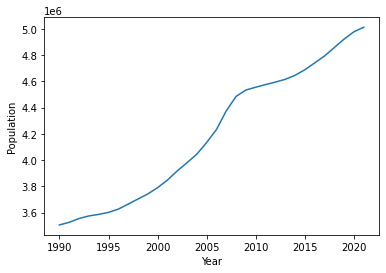

In [44]:
#I want to creat a graph of Ireland's population, I use sns.lineplot() to do this

sns.lineplot(x="Year", y="Population", data=irl_econ_data)
plt.show()

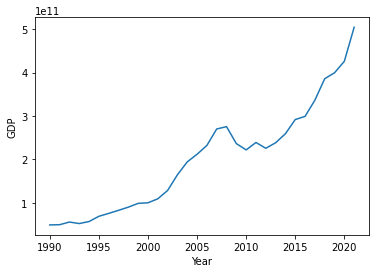

In [45]:
#I want to creat a graph of Ireland's GDP, I use sns.lineplot() to do this
sns.lineplot(x="Year", y="GDP", data=irl_econ_data)
plt.show()

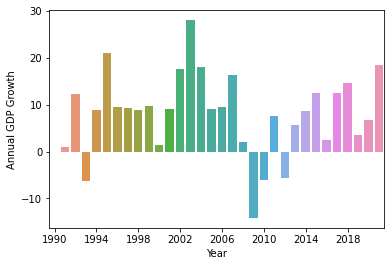

In [46]:
#Barchart of Ireland's GDP growth rate (when I orginally made this bar chart you couldn't read the x axis labels, that is why I have set the x ticks along the specified indices)

sns.barplot(x="Year", y="Annual GDP Growth", data=irl_econ_data)
indices = [0, 4, 8, 12, 16, 20, 24, 28]
labels = irl_econ_data['Year'].unique()[indices]
plt.xticks(indices, labels)
plt.show()


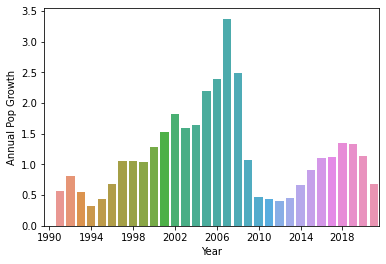

In [47]:
#Barchart of Ireland's Population growth rate
sns.barplot(x="Year", y="Annual Pop Growth", data=irl_econ_data)
indices = [0, 4, 8, 12, 16, 20, 24, 28]
labels = irl_econ_data['Year'].unique()[indices]
plt.xticks(indices, labels)
plt.show()

Relationships between variables

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Tertiary Education % 25-34'>

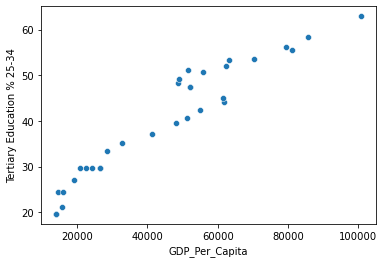

In [48]:
# I want to examine the relationship between educational attainment levels and GDP per Capita, I begin by creating a scatterplot

sns.scatterplot(x='GDP_Per_Capita',y='Tertiary Education % 25-34', data=irl_econ_data)

In [49]:
#It seems that there is a relationship there
#To further examine this I use the .corr() function to see if there a statistical relationship

irl_econ_data['GDP_Per_Capita'].corr(irl_econ_data['Tertiary Education % 25-34'])

#We can see from the output that there is a strong postive relationship between the two variables

0.9579111072718807

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Unemployment (in Percent)'>

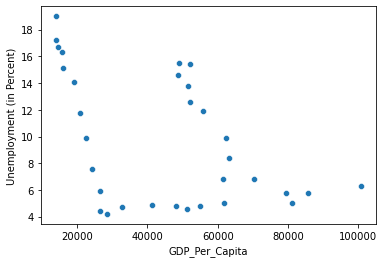

In [50]:
#I now want to examine the relationship between GDP Per Capita and the unemployment rate

sns.scatterplot(x='GDP_Per_Capita',y='Unemployment (in Percent)', data=irl_econ_data)

In [51]:
#It seems like there is a mild relationshop there to further examine this I use .corr() function to see if there a statistical relationship

irl_econ_data['GDP_Per_Capita'].corr(irl_econ_data['Unemployment (in Percent)'])

-0.4781800871809543

In [52]:
#We can see that there is a mildly negative relationship between the two variables.